热狗识别

In [1]:
%matplotlib inline
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [2]:
#@save
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL + 'hotdog.zip',
                          'fba480ffa8aa7e0febbb511d181409f899b9baa5')

data_dir = d2l.download_extract('hotdog')

In [3]:
data_dir

'..\\data\\hotdog'

In [4]:
train_img = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'))
test_img = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'))

In [5]:
train_img[2]

(<PIL.Image.Image image mode=RGB size=264x290>, 0)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

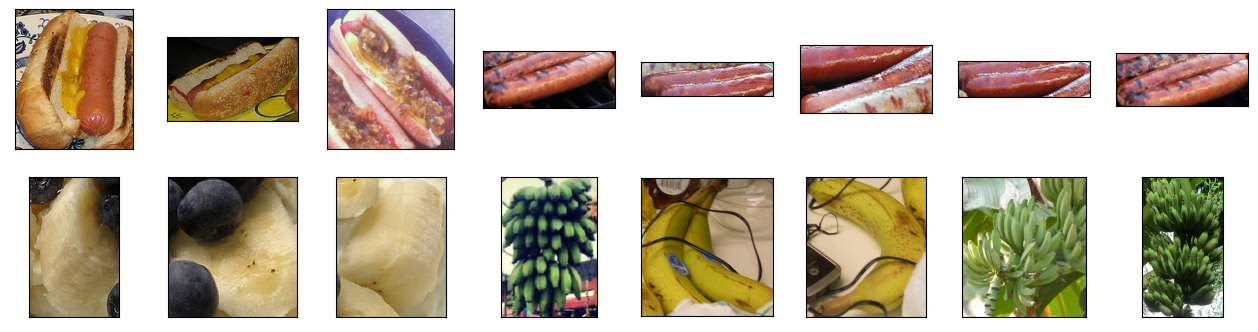

In [6]:
hotdogs = [train_img[i][0] for i in range(8)]
not_hotdogs = [train_img[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=2)

In [9]:
normalize = torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    normalize
])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256, 256]),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize
])

In [10]:
pretrained_net = torchvision.models.resnet18(pretrained=True)

C:\Users\furoc\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\furoc\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2)
nn.init.xavier_uniform_(finetune_net.fc.weight)

Parameter containing:
tensor([[ 0.0067, -0.0599, -0.1054,  ..., -0.0188,  0.0633, -0.0555],
        [ 0.0631, -0.0853,  0.0408,  ..., -0.0384,  0.0003, -0.0454]],
       requires_grad=True)

In [12]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5, param_group=True):
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_augs), batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=test_augs), batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction='none')
    if param_group:
        param_1x = [param for name, param in net.named_parameters() if name not in ['fc.weight', 'fc.bias']]
        trainer = torch.optim.SGD([{'params': param_1x, 'params': net.fc.parameters(), 'lr': learning_rate*10}], lr=learning_rate, weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate, weight_decay=0.001)
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

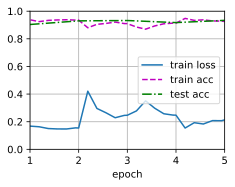

In [16]:
train_fine_tuning(finetune_net, 5e-5, num_epochs=5)

In [18]:


next(iter(torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_augs), batch_size=128, shuffle=True)))

[tensor([[[[ 0.7591,  0.7591,  0.7762,  ...,  1.3413,  1.4098,  1.4098],
           [ 0.7591,  0.7591,  0.7762,  ...,  1.3755,  1.4440,  1.4440],
           [ 0.7248,  0.7248,  0.7419,  ...,  1.5125,  1.5468,  1.5468],
           ...,
           [ 0.1768,  0.1768,  0.1768,  ..., -0.4226, -0.4226, -0.4226],
           [ 0.1939,  0.1939,  0.1939,  ..., -0.4568, -0.4568, -0.4568],
           [ 0.1939,  0.1939,  0.1939,  ..., -0.4568, -0.4568, -0.4568]],
 
          [[-0.4601, -0.4601, -0.4426,  ...,  0.2927,  0.3803,  0.3803],
           [-0.4601, -0.4601, -0.4426,  ...,  0.3452,  0.4328,  0.4328],
           [-0.4776, -0.4776, -0.4601,  ...,  0.5203,  0.5903,  0.5903],
           ...,
           [-0.8452, -0.8452, -0.8452,  ..., -1.1253, -1.1253, -1.1253],
           [-0.8277, -0.8277, -0.8277,  ..., -1.1429, -1.1429, -1.1429],
           [-0.8277, -0.8277, -0.8277,  ..., -1.1429, -1.1429, -1.1429]],
 
          [[-0.4450, -0.4450, -0.4275,  ...,  0.1302,  0.1999,  0.1999],
           [-

In [28]:
torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'))[1225][1]

1